
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Won Lee (Wl6289), Sam Malcolm (STM2334) </p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Tuesday, October 2nd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).**

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [44]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import warnings
import matplotlib
from sklearn.preprocessing import PolynomialFeatures
%pylab inline
warnings.filterwarnings('ignore')

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

Populating the interactive namespace from numpy and matplotlib


#### We want to build a model that can predict y for unknown inputs x.

#### (a)  Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

In [45]:
# Create and fit training model
reg_train = linear_model.LinearRegression()
model_train = reg_train.fit(x_train, y_train)

# Evaluate the test set
pred_train = model_train.predict(x_train)
pred_test = model_train.predict(x_test)
test_rmse = mean_squared_error(y_test, pred_test)

print "The Test MSE is: " + str(test_rmse)

The Test MSE is: 6455.708453830031


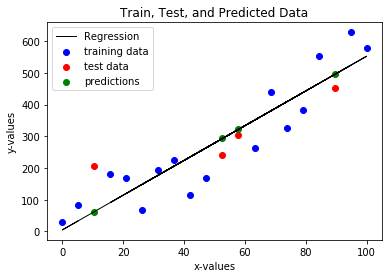

In [46]:
plt.scatter(x_train, y_train, c = 'b', label = 'training data')
plt.scatter(x_test, y_test, c = 'r', label = 'test data')
plt.scatter(x_test, pred_test, c = 'g', label = 'predictions')
plot(x_train, pred_train, color='black', linewidth=1, label='Regression')

plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('Train, Test, and Predicted Data')
plt.legend()

#### (b) Fit polynomial models of degrees 1,2,3 and 5 to the training data, and report mean squared error for both models. Plot the data, the fitted models, and the predicted outputs.

In [47]:
# 1st degree
# Create and fit training model
reg_train = linear_model.LinearRegression()
model_train = reg_train.fit(x_train, y_train)

# Evaluate the test set
pred_train = model_train.predict(x_train)
pred_test = model_train.predict(x_test)
train_rmse = mean_squared_error(y_train, pred_train)
test_rmse = mean_squared_error(y_test, pred_test)

print "The Train MSE with 1 degree is: " + str(train_rmse)
print "The Test MSE with 1 degree is: " + str(test_rmse)

The Train MSE with 1 degree is: 5339.13205212213
The Test MSE with 1 degree is: 6455.708453830031


In [48]:
# 2 Degrees

poly_2 = PolynomialFeatures(degree=2)
x_2 = poly_2.fit_transform(x_train)
x_2_test = poly_2.fit_transform(x_test)

reg_2 = linear_model.LinearRegression()
model_2 = reg_2.fit(x_2, y_train)

pred_2 = model_2.predict(x_2)
pred_2_test = model_2.predict(x_2_test)

train_rmse_2 = mean_squared_error(y_train, pred_2)
test_rmse_2 = mean_squared_error(y_test, pred_2_test)

print "The Train MSE with 2 degrees is: " + str(train_rmse_2)
print "The Test MSE with 2 degrees is: " + str(test_rmse_2)

The Train MSE with 2 degrees is: 3638.12177725299
The Test MSE with 2 degrees is: 4683.309906329018


In [49]:
# 3 Degrees
poly_3 = PolynomialFeatures(degree=3)
x_3 = poly_3.fit_transform(x_train)
x_3_test = poly_3.fit_transform(x_test)

reg_3 = linear_model.LinearRegression()
model_3 = reg_3.fit(x_3, y_train)

pred_3 = model_3.predict(x_3)
pred_3_test = model_3.predict(x_3_test)
train_rmse_3 = mean_squared_error(y_train, pred_3)
test_rmse_3 = mean_squared_error(y_test, pred_3_test)

print "The Train MSE with 3 degrees is: " + str(train_rmse_3)
print "The Test MSE with 3 degrees is: " + str(test_rmse_3)

The Train MSE with 3 degrees is: 3569.9003663071185
The Test MSE with 3 degrees is: 4602.202716053174


In [50]:
# 5 Degrees
poly_5 = PolynomialFeatures(degree=5)
x_5 = poly_5.fit_transform(x_train)
x_5_test = poly_5.fit_transform(x_test)

reg_5 = linear_model.LinearRegression()
model_5 = reg_5.fit(x_5, y_train)

pred_5 = model_5.predict(x_5)
pred_5_test = model_5.predict(x_5_test)
train_rmse_5 = mean_squared_error(y_train, pred_5)
test_rmse_5 = mean_squared_error(y_test, pred_5_test)

print "The Train MSE with 5 degrees is: " + str(train_rmse_5)
print "The Test MSE with 5 degrees is: " + str(test_rmse_5)

The Train MSE with 5 degrees is: 2661.566074438367
The Test MSE with 5 degrees is: 6599.133603518136


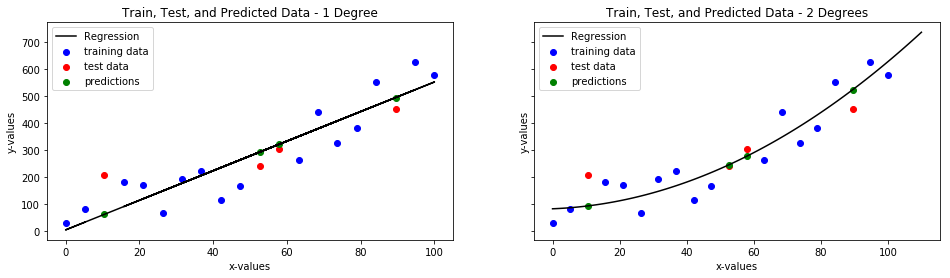

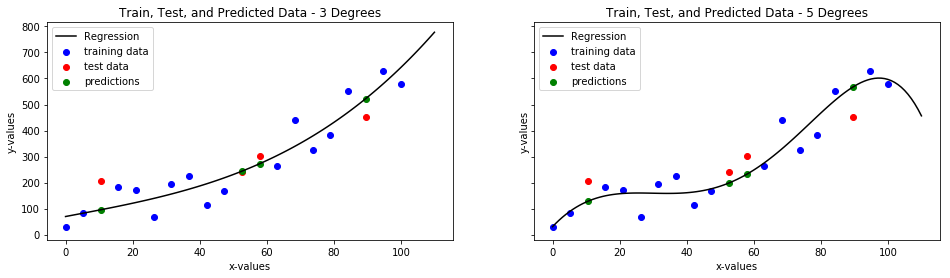

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
#xfit = np.linspace(0, 100, 10000)
#reg_2.fit(x_2.reshape(-1,1), y_train)
#yfit_2 = reg_2.predict(xfit.reshape(-1,1))



fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                sharey=True,
                                figsize=(16,4))
ax1.scatter(x_train, y_train, c = 'b', label = 'training data')
ax1.scatter(x_test, y_test, c = 'r', label = 'test data')
ax1.scatter(x_test, pred_test, c = 'g', label = 'predictions')
ax1.plot(x_train, pred_train, color='black', label='Regression')

ax1.set_xlabel('x-values')
ax1.set_ylabel('y-values')
ax1.set_title('Train, Test, and Predicted Data - 1 Degree')
ax1.legend()

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(np.array(x_train).reshape(-1, 1), y_train)
x_reg2 = np.arange(111)
y_reg2 = model.predict(x_reg2.reshape(-1, 1))

ax2.scatter(x_train, y_train, c = 'b', label = 'training data')
ax2.scatter(x_test, y_test, c = 'r', label = 'test data')
ax2.scatter(x_test, pred_2_test, c = 'g', label = 'predictions')
ax2.plot(x_reg2, y_reg2, color = 'black', label = 'Regression')

ax2.set_xlabel('x-values')
ax2.set_ylabel('y-values')
ax2.set_title('Train, Test, and Predicted Data - 2 Degrees')
ax2.legend()

fig, (ax3, ax4) = subplots(nrows=1,
                                ncols=2,
                                sharey=True,
                                figsize=(16,4))

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(np.array(x_train).reshape(-1, 1), y_train)
x_reg3 = np.arange(111)
y_reg3 = model.predict(x_reg3.reshape(-1, 1))

ax3.scatter(x_train, y_train, c = 'b', label = 'training data')
ax3.scatter(x_test, y_test, c = 'r', label = 'test data')
ax3.scatter(x_test, pred_3_test, c = 'g', label = 'predictions')
ax3.plot(x_reg3, y_reg3, color = 'black', label = 'Regression')

ax3.set_xlabel('x-values')
ax3.set_ylabel('y-values')
ax3.set_title('Train, Test, and Predicted Data - 3 Degrees')
ax3.legend()

model = make_pipeline(PolynomialFeatures(5), LinearRegression())
model.fit(np.array(x_train).reshape(-1, 1), y_train)
x_reg5 = np.arange(111)
y_reg5 = model.predict(x_reg5.reshape(-1, 1))

ax4.scatter(x_train, y_train, c = 'b', label = 'training data')
ax4.scatter(x_test, y_test, c = 'r', label = 'test data')
ax4.scatter(x_test, pred_5_test, c = 'g', label = 'predictions')
ax4.plot(x_reg5, y_reg5, color = 'black', label = 'Regression')

ax4.set_xlabel('x-values')
ax4.set_ylabel('y-values')
ax4.set_title('Train, Test, and Predicted Data - 5 Degrees')
ax4.legend()


#### (c) Which model performed the best? Explain using the bias-variance tradeoff.

The most effective model was the polynomial model of the third degree. It proved to be flexible enough to adapt to the slight curvature in the data, decreasing bias, but it did not chase the noise in the training data to the point that it would be negated by an increase in variance. Essentially, the model was not anchored to be purely linear, allowing it to adapt to any curvature in the data by being more flexible. This decreased biased by avoiding the presupposition that the model should be purely linear. At the same time, it avoided chasing the noise in the training data that would have increased variance in the result. The decrease in bias was much lower than any increase in variance in this particular model, resulting in a much lower mean squared error than the linear model or the polynomial model of the fifth degree.

# Question 1. Data Exploration (20pts)
Use the following code to import the dataset.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data
data = pd.read_csv('data_q1.csv', index_col=0)

The columns are:
  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)

We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

#### (a) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows.

In [53]:
print shape(data)
data.head()

(200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### (b) Generate box-plots for each of the four columns and identify the cutoff values for outliers.

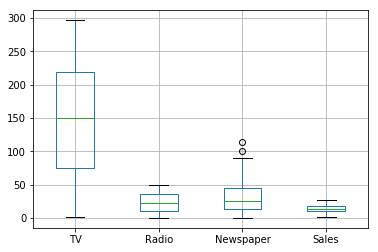

In [54]:
data.boxplot()

In [55]:
media = ['TV', 'Radio', 'Newspaper', 'Sales']

for m in media:
    upper_q = data[m].quantile(0.75)
    lower_q = data[m].quantile(0.25)
    iqr = upper_q - lower_q
    upper_cut = upper_q + (1.5*(iqr))
    lower_cut = lower_q - (1.5*(iqr))
    print "Cutoffs for " + str(m) + ": " + str(lower_cut) + ", " + " " + str(upper_cut)

Cutoffs for TV: -142.3,  435.5
Cutoffs for Radio: -29.85,  76.35
Cutoffs for Newspaper: -35.775,  93.625
Cutoffs for Sales: -0.1625,  27.9375


#### (c) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.

Text(0,0.5,'Sales')

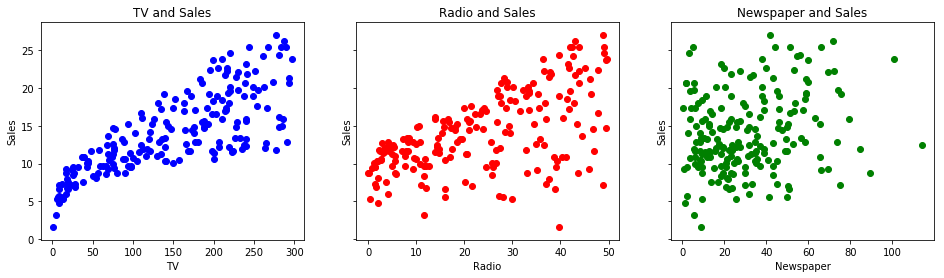

In [56]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                sharey=True,
                                figsize=(16,4))
ax1.scatter(data.TV, data.Sales, color = 'blue')
ax1.set_title('TV and Sales')
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2.scatter(data.Radio, data.Sales, color = 'red')
ax2.set_title('Radio and Sales')
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3.scatter(data.Newspaper, data.Sales, color = 'green')
ax3.set_title('Newspaper and Sales')
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')

TV - TV appears to have the most directly, positive linear relationship on sales. However, it does begin to spread as the TV spend increases. This indicates that the predicted response is less reliable (higher variance) at higher levels of TV spend.

Radio - Radio also appear linear, though less so than TV. There is a clear pattern trending positively, but higher variance throughout concentrated lower in the Y axis.

Newspaper - There appears to be no clear correlation between Newspaper spend and Sales.

#### (d) Fit a simple linear regression of 'Sales' on 'TV'. What is the regression coefficient for 'TV'? What is its interpretation?

In [57]:
import statsmodels.api as sm
from patsy import dmatrices

# Create design matrices
y_sales, x_tv = dmatrices('Sales ~ TV', data=data, return_type='dataframe')

# Create and fit model
model = sm.OLS(y_sales, x_tv)
result = model.fit()  

# Print coefficients
print "The regression coefficient for 'TV' is " + str(result.params[1])

The regression coefficient for 'TV' is 0.047536640433019764


The interpretation is that, all else constant, for each additional 1 unit (dollar?) of TV ad spend, you are predicted  to increase your sales by 0.0475 units (dollars).

#### Now split the data randomly into a training and test set (keep one third of the data for test), using train_test_split from sklearn. Use test_size as 0.33 and random_state as 42.

In [58]:
from sklearn.cross_validation import train_test_split

x = data.drop(['Sales'],axis=1)
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state=42) 

#### (e) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. (Sales is the dependent variable)

In [59]:
# Create and fit training model
reg_train = linear_model.LinearRegression()
model_train = reg_train.fit(x_train, y_train)

# Evaluate the test set
pred_test = model_train.predict(x_test)
rmse_test = sqrt(mean_squared_error(y_test, pred_test))

print "The Test RMSE is: " + str(rmse_test)

The Test RMSE is: 1.93078438223472


#### (f) Report the MSE obtained on train data. How much does this increase when you score your model on test data?

In [60]:
pred_train = model_train.predict(x_train)
rmse_train = sqrt(mean_squared_error(y_train, pred_train))

print "The Train RMSE is: " + str(rmse_train)
print "Test RMSE is " + str(rmse_test - rmse_train) + " greater than Train RMSE."

The Train RMSE is: 1.5526939990087725
Test RMSE is 0.37809038322594746 greater than Train RMSE.


#### (g) Report the coefficients obtained by your model.

In [61]:
model_train_features = ['TV', 'Radio', 'Newspaper']
print(list(zip(model_train_features, model_train.coef_)))

[('TV', 0.04466512063271282), ('Radio', 0.1966300628262483), ('Newspaper', 0.006074386547886876)]


# Question 2. Regression (25pts)

Use the following dataset for this question. Split the dataset into train and test set(already done for you.)


In [62]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

In [63]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state=10) 

#### a) Fit an MLR, using ordinary least squares, on all the feature variables using the training data. Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

In [64]:
# Create and fit training model
reg_train = linear_model.LinearRegression()
model_train = reg_train.fit(X_train, y_train)

# Evaluate the training set
pred_train = model_train.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, pred_train))

print "The Train MAE is: " + str(rmse_train)

# Evaluate the test set
pred_test = model_train.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, pred_test))

print "The Test MAE is: " + str(rmse_test)

print "RMSE increases by " + str(rmse_test - rmse_train) + " when scoring our model on test data."

The Train MAE is: 52.007732294217874
The Test MAE is: 57.428059772853565
RMSE increases by 5.420327478635691 when scoring our model on test data.


#### b) Now fit the regression model using Huber loss. You can use the sklearn package. Set regularization parameter alpha to 0.0 and all other parameters as default. Report RMSE obtained on both X_train and X_test.

In [65]:
huber = linear_model.HuberRegressor(alpha = 0)
huber_train = huber.fit(X_train,y_train)

huber_train_pred = huber_train.predict(X_train)
rmse_huber_train = sqrt(mean_squared_error(y_train, huber_train_pred))

print "The Train MAE is: " + str(rmse_huber_train)

huber_test_pred = huber_train.predict(X_test)
rmse_huber_test = sqrt(mean_squared_error(y_test, huber_test_pred))

print "The Test RMSE is: " + str(rmse_huber_test)

The Train MAE is: 52.167114519625
The Test RMSE is: 57.163266011285316


#### Now we will introduce outlier in the training set and train our model to see how the model performs. (Code provided)

#### c) Fit the MLR model on X_train and y_train_outlier and calculate the RMSE on train and test set.

In [66]:
y_train_outliers = np.copy(y_train)
y_train_outliers[0] = 5000.0

In [67]:
# Create and fit training model
reg_train2 = linear_model.LinearRegression()
model_train2 = reg_train2.fit(X_train, y_train_outliers)

# Evaluate the training set
pred_train2 = model_train2.predict(X_train)
rmse_train2 = sqrt(mean_squared_error(y_train_outliers, pred_train2))

print "The Train MAE is: " + str(rmse_train2)

# Evaluate the test set
pred_test2 = model_train2.predict(X_test)
rmse_test2 = sqrt(mean_squared_error(y_test, pred_test2))

print "The Test MAE is: " + str(rmse_test2)

The Train MAE is: 286.2641030656008
The Test MAE is: 82.21820407137496


#### d) Fit the regression model with Huber loss on X_train and y_train_outier. Calculate the RMSE on train and test set. Compare the RMSE of both the models.

In [68]:
huber2 = linear_model.HuberRegressor(alpha = 0)
huber_train2 = huber2.fit(X_train,y_train_outliers)

huber_train_pred2 = huber_train2.predict(X_train)
rmse_huber_train2 = sqrt(mean_squared_error(y_train_outliers, huber_train_pred2))

print "The Train MAE is: " + str(rmse_huber_train2)

huber_test_pred2 = huber_train2.predict(X_test)
rmse_huber_test2 = sqrt(mean_squared_error(y_test, huber_test_pred2))

print "The Test RMSE is: " + str(rmse_huber_test2)

The Train MAE is: 290.22226498624167
The Test RMSE is: 57.56710215190541


#### e) Calculate the residuals on the test set for both the models obtained in (c) and (d). Plot the scatter plot of residual vs fitted value for both the models. What do you observe? Which model looks better?

Text(0.5,1,'Residual vs Fitted Plot - Robust Regression with Huber Loss')

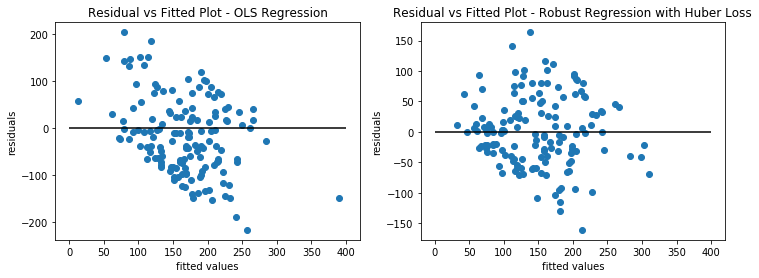

In [69]:
residuals_mlr = y_test - pred_test2
residuals_huber = y_test - huber_test_pred2

fig, (ax1, ax2) = subplots(nrows=1,
                                ncols=2,
                                figsize=(12,4))
ax1.scatter(pred_test2, residuals_mlr)
ax1.hlines(y=0,xmin=0,xmax=400)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.set_title('Residual vs Fitted Plot - OLS Regression')

ax2.scatter(huber_test_pred2, residuals_huber)
ax2.hlines(y=0,xmin=0,xmax=400)
ax2.set_xlabel('fitted values')
ax2.set_ylabel('residuals')
ax2.set_title('Residual vs Fitted Plot - Robust Regression with Huber Loss')

There is a clear linear relationship between residuals and fitted values in the OLS Regression plot. This indicates that there is some error in the model that we can improve on. Knowing what we are working with, we can assume that the outlier is too strongly influencing the model. This is causing us to overestimate for smaller values and underestimate for larger values.

Improvement can be observed in the Huber plot. While still generally linear in its distribution, the data points are more spread and varied. The outlier is still influencing the model, but it's effect has been diminished. 

#### Now we will do feature selection. The features of X matrix are named as x1,x2,.... . We have created a list feature_name which stores the feature name (Code provided). So x1 means the first column of X, x2 means the second column of X and so on.

#### f) Backward Selection: Find the three most significant factors using backward feature selection. You may find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html. Use X_train and y_train for your model.

In [70]:
feature_name = ['x'+str(i) for i in range(1,11)]
print(feature_name)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']


In [71]:
# Create and fit training model
back = RFE(reg_train2, n_features_to_select=3)
model_back = back.fit(X_train, y_train)

print model_back.ranking_
print "The three most significant features with backward selection are x3, x5, and x9"

[8 6 1 2 1 5 4 3 1 7]
The three most significant features with backward selection are x3, x5, and x9


#### g) Forward Selection: Find the three most significant feature using forward selection. Check if it is same as the ones you got in part (f). Use X_train and y_train for your model. Hint : Use a for loop to implement forward feature selection

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = linear_model.LinearRegression()

forward = SFS(lr, 
          k_features=3, 
          forward=True, 
          floating=False,
          scoring = 'mean_squared_error')

model_forward = forward.fit(X_train, y_train)
print model_forward.k_feature_idx_
print "The three most significant features with forward selection are x2, x3, and x8" 

(2, 3, 8)
The three most significant features with forward selection are x2, x3, and x8


# Question 3. Sampling (5pts)

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.



## Answer

#### (a) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

In [73]:
n = (.3*(1-.3))/np.square(0.09/1.645)

print str(int(n+1)) + " survey participants are needed."

71 survey participants are needed.


#### (b) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

In [74]:
n2 = (.3*(1-.3))/np.square(0.09/1.96)

print str(int(n2+1)) + " survey participants are needed."

100 survey participants are needed.


#### (c) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

In [75]:
n3 = (.5*(1-.5))/np.square(0.09/1.96)

print str(int(n3+1)) + " survey participants are needed."

119 survey participants are needed.


# Question 4. Principal Component Analysis (10pts)

Use the following code to read in data of US Imports.

In [76]:
df = pd.read_csv('data_q4.csv', index_col=0)
df.head()

,"Agricultural machinery, equipment","Alcoholic beverages, excluding wine","Apparel, household goods - cotton","Apparel, household goods - wool","Apparel, textiles, nonwool or cotton","Apparel,household goods-nontextile","Artwork, antiques, stamps, etc.",Automotive tires and tubes,Bakery products,Bauxite and aluminum,...,Toiletries and cosmetics,"Toys, games, and sporting goods","Trucks, buses, and special purpose vehicles","U.S. goods returned, and reimports",Vegetables,"Vessels, except scrap","Wine, beer, and related products","Wood, glass, plastic","Wool, silk, etc.",Zinc
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3105.0,0.0,10739.0,7314.0,11942.0,2720.0,402303.0,0.0,12081.0,0.0,...,0.0,0.0,0.0,6156613.0,25873.0,0.0,61741.0,8474.0,3350.0,0.0
Albania,0.0,34741.0,2752171.0,50838.0,1298224.0,889107.0,286011.0,0.0,0.0,182556.0,...,4446.0,0.0,0.0,66682.0,519964.0,0.0,14112.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,20217.0,0.0,0.0,0.0,...,22947.0,0.0,0.0,29474254.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,351.0,0.0,0.0,3683.0,0.0,0.0,0.0,4741.0,...,0.0,0.0,0.0,67589.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,24505.0,0.0,0.0,0.0,0.0,6412.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2992.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = stdScaler.fit_transform(df)

#### (a) Find the top two principal components from this dataset, and make a scatter plot with the first component as the x-axis and the second as the y-axis. You may find the sklearn PCA package to be useful.

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.fit_transform(df_scaled)

Text(0,0.5,'principle component 2')

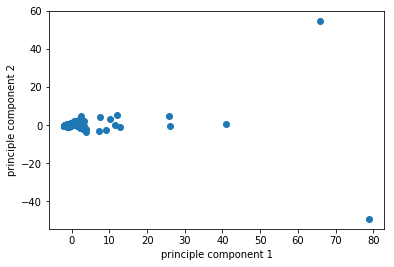

In [79]:
plt.scatter(x=X_pca[:,0], y=X_pca[:,1]) 
xlabel('principle component 1')
ylabel('principle component 2')

#### (b) Find the names of the six countries with the highest first component (these should be clear outliers).

In [80]:
pc_1 = pd.Series(X_pca[:,0], index = df.index)
pc_1.sort_values(ascending=False)[:6]

Country
China      78.808512
Canada     65.904733
Mexico     40.812633
Japan      26.098581
Germany    25.743293
Italy      12.843229
dtype: float64

#### (c) Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  If you are using sklearn's PCA implementation, you may use the output attribute *explained variance ratio*.

Text(0.5,1,'Cumulative Proportion of Variance per PC')

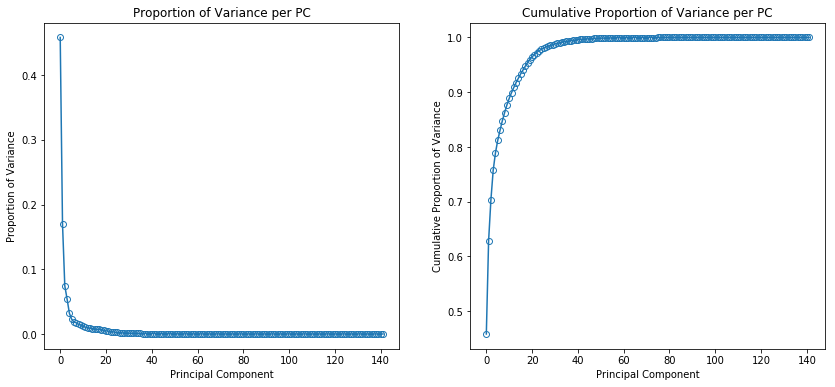

In [81]:
pca_all = PCA()
pca_all.fit(df_scaled)

fig, (ax1, ax2) = subplots(nrows=1,ncols=2,figsize=(14,6))

ax1.plot(pca_all.explained_variance_ratio_, marker = 'o', markerfacecolor='none') 
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Variance')
ax1.set_title('Proportion of Variance per PC')

ax2.plot(np.cumsum(pca_all.explained_variance_ratio_), marker = 'o', markerfacecolor='none')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Cumulative Proportion of Variance')
ax2.set_title('Cumulative Proportion of Variance per PC')

#### (d) How many principal components are required to explain cumulative variance of 30%, 60%, and 90%, respectively?

In [82]:
cum_exp = np.cumsum(pca_all.explained_variance_ratio_)

pca_30 = np.where(cum_exp >= 0.3)[0][0]+1
pca_60 = np.where(cum_exp >= 0.6)[0][0]+1
pca_90 = np.where(cum_exp >= 0.9)[0][0]+1

print '{} principal component is required to explain cumulative variance of 30%'.format(pca_30)
print '{} principal components are required to explain cumulative variance of 60%'.format(pca_60)
print '{} principal components are required to explain cumulative variance of 90%'.format(pca_90)

1 principal component is required to explain cumulative variance of 30%
2 principal components are required to explain cumulative variance of 60%
13 principal components are required to explain cumulative variance of 90%


# Question 5. PCA (conceptual) (10pts)

#### (a) Give two reasons why we might want to use PCA.

1. PCA can help offset or reduce the affects of collinearity amongst features by performing regression in the transformed space (PCR) due to the orthogonal relationship between the PCs.
2. Dimensionality Reduction or Feature Extraction: PCA will aggregate all the features together into individual principal components where all the features are represented together. We can drop the variables of least importance while still keeping parts of the information provided by said variables. This allows every feature to be represented in our statistical analysis while also allowing us to reduce the dimensions we need to work with. 

#### (b) If we approach PCA using eigenvalue decomposition on the covariance matrix, explain what the eigenvectors and eigenvalues represent.

The eigenvector and eigenvalue are decomposed from the covariance matrix, allowing for greater interpretability for each principal component. The eigenvector, or the principal component, acts as the direction the vector needs to point in the feature space in order to capture the highest amount of variability in the data, allowing itself to be stretched or squashed by the eigenvalue accordingly. Each eigenvalue represents the importance of its corresponding eigenvector and is used to gauge which principal component captures the most amount of variance and therefore information. In a sense, the eigenvalue is the magnitude of the eigenvector and it explains the variance of the data along its feature axes. Consequently, the smallest eigenvalues correspond to the direction with the least amount of variation, and the largest eigenvalues correspond to the direction with the most amount of variance.